<a href="https://colab.research.google.com/github/Jqudes/first-project/blob/master/NaturalLanguage_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

#전처리할 텍스트를 정합니다.
text = '해보지 않으면 해낼 수 없다'

#해당 텍스트를 토큰화합니다.
result = text_to_word_sequence(text)
print("\n원문:\n",text)
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import to_categorical

from numpy import array

#텍스트 리뷰 자료를 지정합니다.
docs = ["너무 재밌네요","최고에요","참 잘 만든 영화예요", "추천하고 싶은 영화입니다", "한번 더 보고싶네요", "글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

#긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
classes = array([1,1,1,1,1,0,0,0,0,0])

#토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

x = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과:\n", x)

#패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x,4)
print("\n패딩 결과:\n", padded_x)

#임베딩에 입력될 단어의 수를 지정합니다.
word_size = len(token.word_index) +1

#단어 임베딩을 포함해 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(word_size,8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

{'너무': 1, '재밌네요': 2, '최고에요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]

패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 4, 8)              168       
                                                                 
 flatten_26 (Flatten)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                            

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Epoch 1/200
450/450 [==============================] - 19s 38ms/step - loss: 2.2737 - accuracy: 0.4119 - val_loss: 1.9539 - val_accuracy: 0.4960
Epoch 2/200
450/450 [==============================] - 6s 13ms/step - loss: 1.8243 - accuracy: 0.5220 - val_loss: 1.7343 - val_accuracy: 0.5579
Epoch 3/200
450/450 [==============================] - 4s 10ms/step - loss: 1.6956 - accuracy: 0.5549 - val_loss: 1.6199 - val_accuracy: 0.5873
Epoch 4/200
450/450 [==============================] - 5s 10ms/step - loss: 1.4733 - accuracy: 0.6315 - val_loss: 1.4465 - val_accuracy: 0.6492
Epoch 5/200
450/450 [================

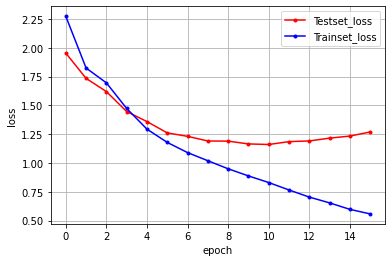

In [ ]:
# LSTM을 이용해 로이터 뉴스 카테고리 분석하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

#데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

#데이터를  확인해 보겠습니다.
category = np.max(y_train)+1
print(category, '카테고리')
print(len(X_train),'학습용 뉴스 기사')
print(len(X_test),'테스트용 뉴스 기사')
print(X_train[0])

#단어의 수를 맞추어 줍니다
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

#원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

#모델의 실행 옵션을 정합니다
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#합습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

#모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200,
                    validation_data=(X_test,y_test), callbacks=[early_stopping_callback])

#테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test,y_test)[1]))

#학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

#그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()